<a href="https://colab.research.google.com/github/AzadMehedi/Data-Wrangling/blob/main/Capping_Outliers_in_the_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

In [64]:
from sklearn.datasets import fetch_california_housing
ca = fetch_california_housing()
dir(ca)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [65]:
X = ca.data
y = ca.target

In [67]:
data = np.concatenate((X,y.reshape(-1,1)), axis=1)

In [70]:
df = pd.DataFrame(data, columns=ca.feature_names+['target'])
df.sample(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
4204,3.6667,47.0,4.339960,1.013917,1445.0,2.872763,34.11,-118.26,2.10900
6492,3.6531,30.0,4.562000,1.044000,1969.0,3.938000,34.08,-118.01,1.66300
18038,9.3834,21.0,8.700000,1.060714,1811.0,3.233929,37.22,-121.93,5.00001
7290,2.1044,36.0,3.379464,1.011161,1496.0,3.339286,33.98,-118.22,1.48200
2524,3.2500,28.0,5.979675,1.052846,673.0,2.735772,39.55,-122.18,0.81600
12332,3.2578,18.0,5.755155,1.213918,919.0,2.368557,33.94,-116.47,0.85200
19877,5.8673,16.0,7.211111,1.042222,1471.0,3.268889,36.36,-119.25,1.54800
17863,4.1389,19.0,4.478723,1.029255,1224.0,3.255319,37.42,-121.91,1.74100
10765,6.1426,32.0,6.621974,0.970205,1381.0,2.571695,33.63,-117.90,4.50700
489,3.0417,48.0,4.690632,1.126362,1656.0,3.607843,37.86,-122.25,4.89600


In [71]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')

In [73]:
df.shape

(20640, 9)

In [74]:
# droping 'Latitude', 'Longitude' columns
df.drop(['Latitude', 'Longitude'], axis=1, inplace=True)

In [75]:
df.shape

(20640, 7)

In [79]:
a = df.describe()
a

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,5.000010


In [80]:
print(f"There are {df.shape[0]} Rows.")
print(f"There are {df.shape[1]} dataframe columns/features.")
print('\n-------------------------')

num_cols = a.columns
num_cols
cat_cols = [df.columns[i] for i in range(len(df.columns)) if df.columns[i] not in num_cols ]

print(f'There are {len(num_cols)} Numerical columns: ')
for i in range(len(num_cols)):
  print(f'{i+1}. {num_cols[i]}')

print(f'\nThere are {len(cat_cols)} Categorical columns: ')
for i in range(len(cat_cols)):
  print(f'{i+1}. {cat_cols[i]}')


There are 20640 Rows.
There are 7 dataframe columns/features.

-------------------------
There are 7 Numerical columns: 
1. MedInc
2. HouseAge
3. AveRooms
4. AveBedrms
5. Population
6. AveOccup
7. target

There are 0 Categorical columns: 


In [82]:
features = ['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup']
features

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

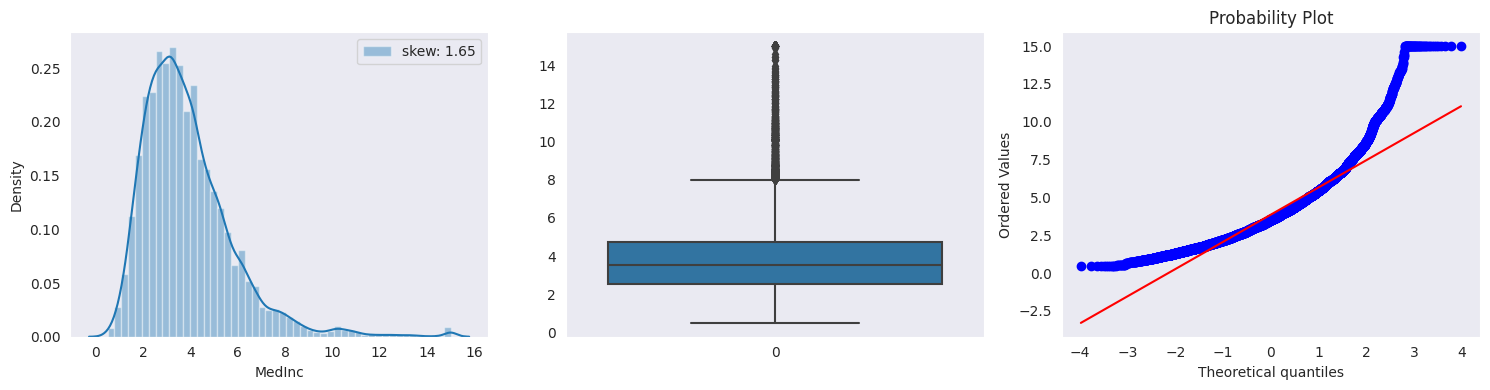

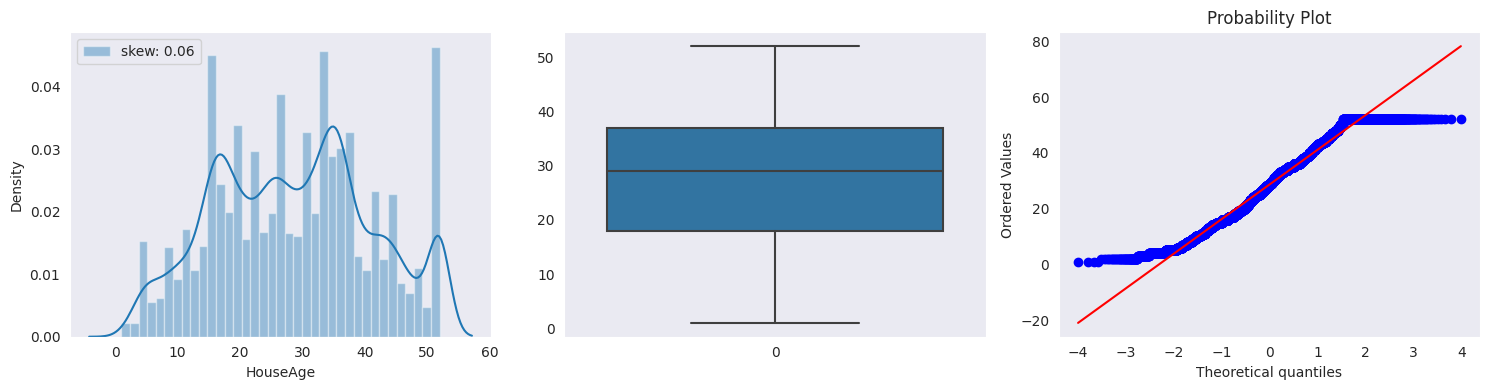

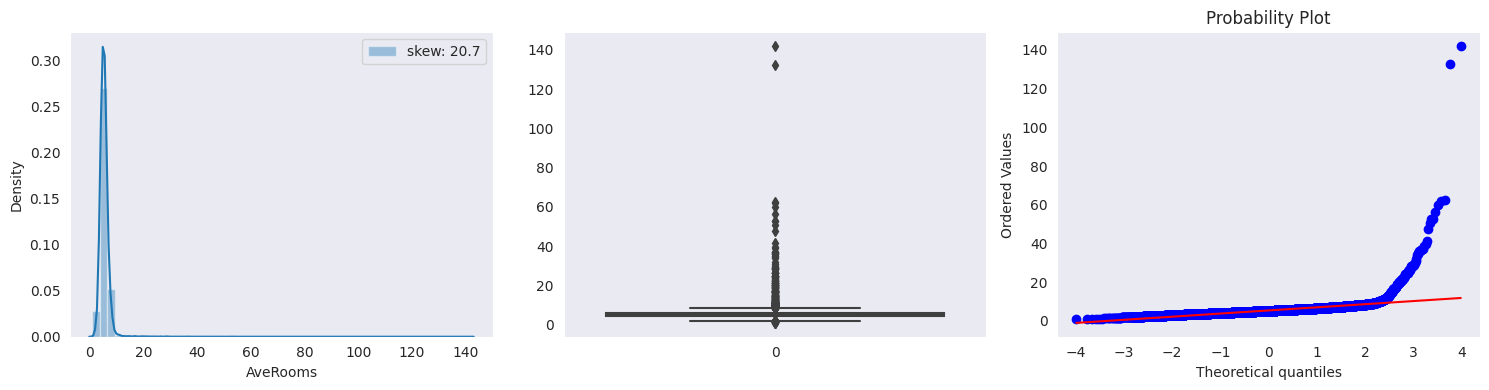

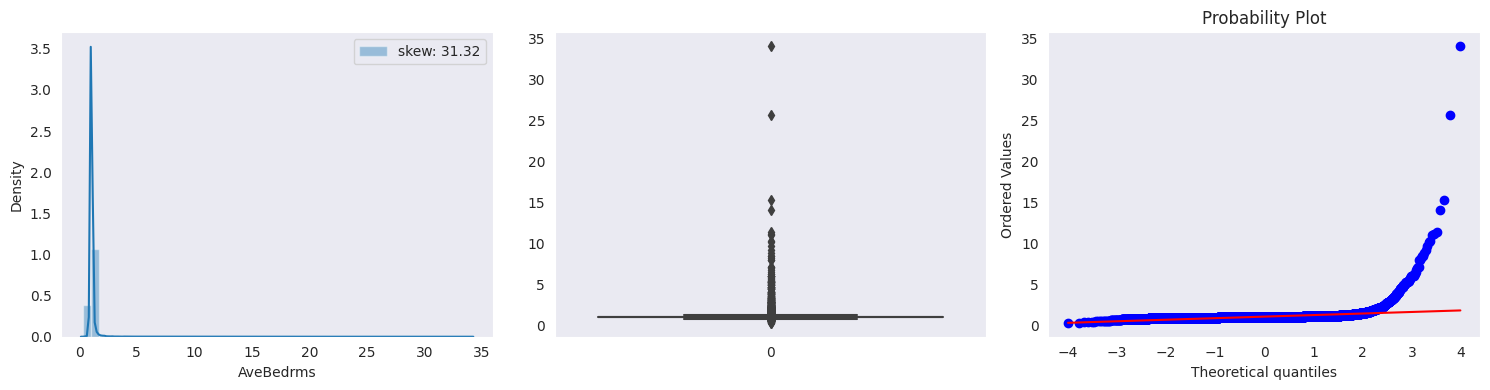

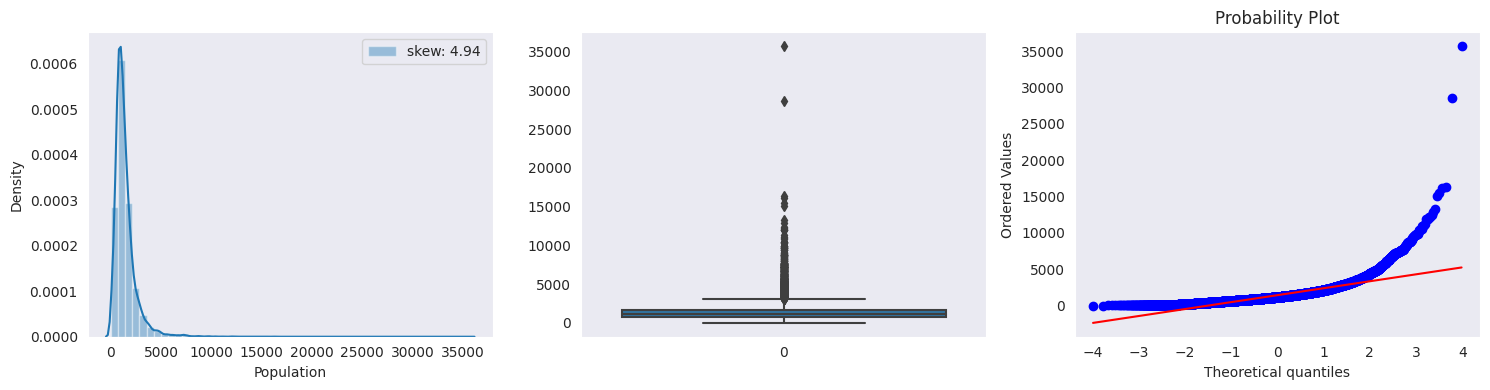

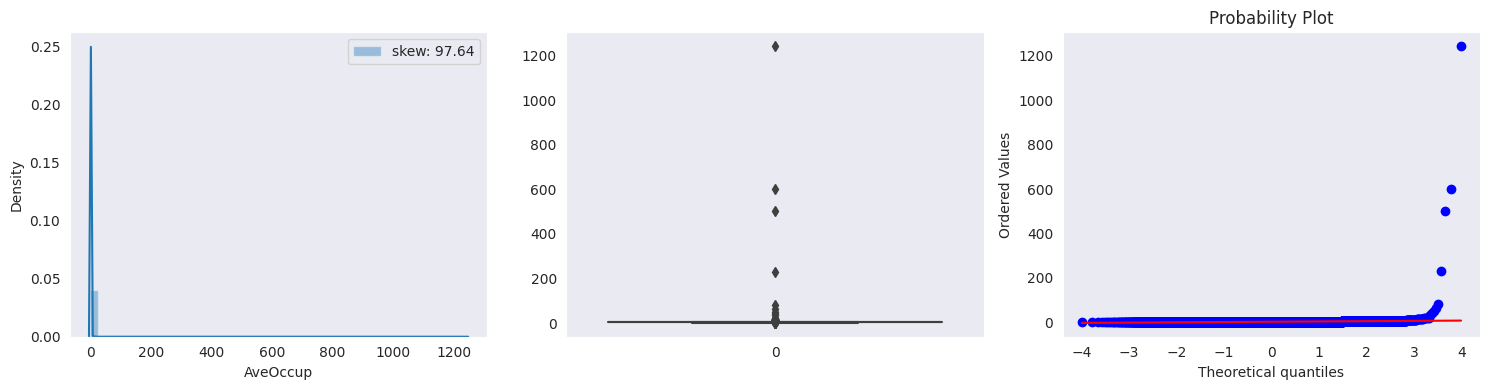

In [86]:
sns.set_style('dark')
for col in features:
  plt.figure(figsize=(15,4))

  plt.subplot(131)
  sns.distplot(df[col], label='skew: ' + str(np.round(df[col].skew(),2)))
  plt.legend()

  plt.subplot(132)
  sns.boxplot(df[col])

  plt.subplot(133)
  stats.probplot(df[col], plot=plt)

  plt.tight_layout()
  plt.show()

# Z score method

Using Z score method,we can find out how many standard deviations value away from the mean.

Figure in the left shows area under normal curve and how much area that standard deviation covers.
* 68% of the data points lie between + or - 1 standard deviation.
* 95% of the data points lie between + or - 2 standard deviation
* 99.7% of the data points lie between + or - 3 standard deviation

- The methos of using Z scores for capping / trimming the outliers is valid only  if the particular feature is normally distributed.
- Since out data here is not normally distributed, we should use other techniques, one of which is `IQR` method

# Capping using IQR method

In [87]:
df1 = df.copy()


In [89]:
def iqr_capping(df, cols, factor):
  for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    upper_whisker = q3+(factor*iqr)
    lower_whisker = q1-(factor*iqr)

    df[col] = np.where(df[col]>upper_whisker, upper_whisker,
                       np.where(df[col]<lower_whisker, lower_whisker, df[col]))


iqr_capping(df1, features, 1.5)


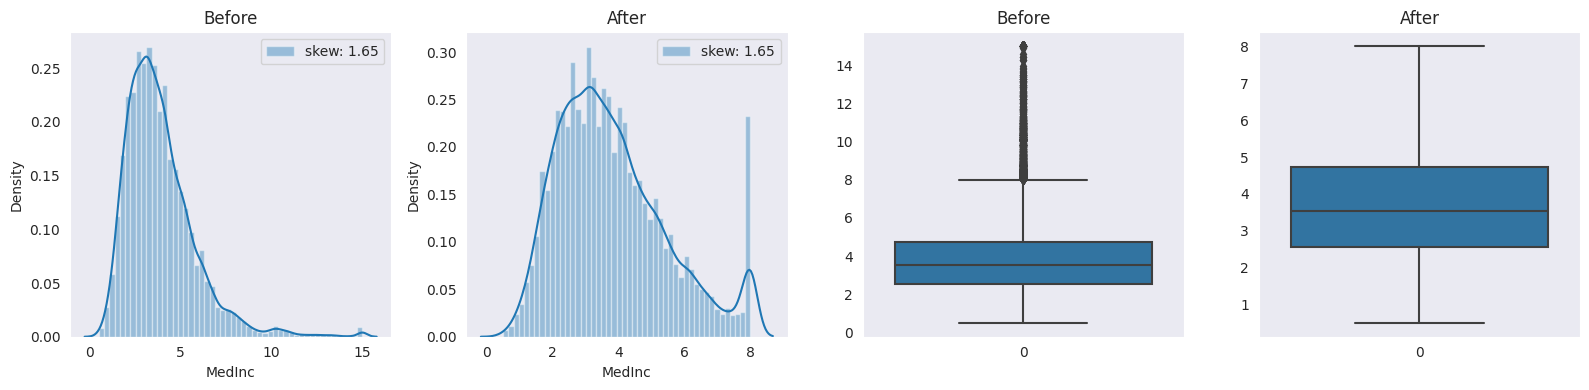

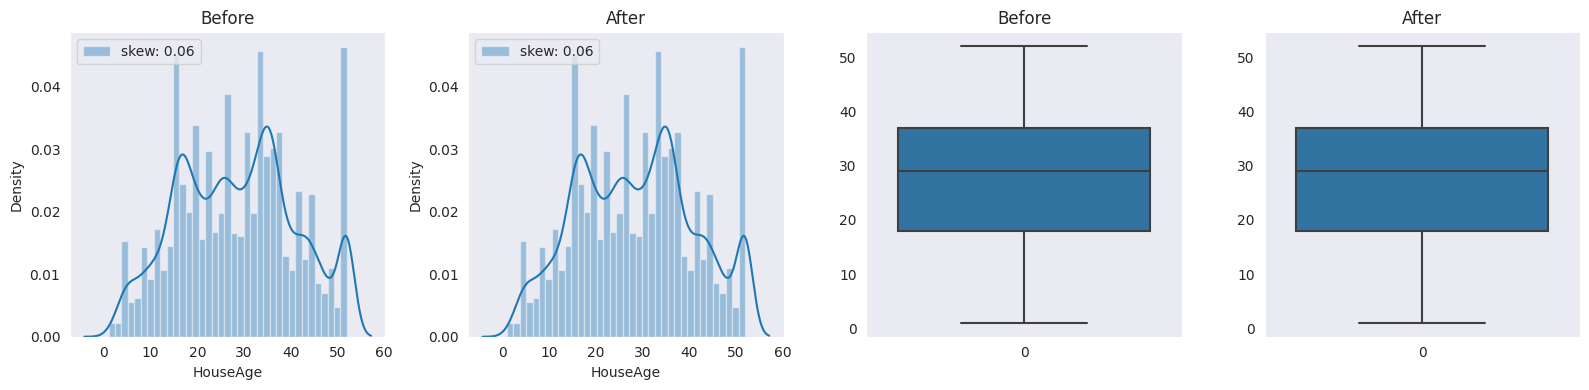

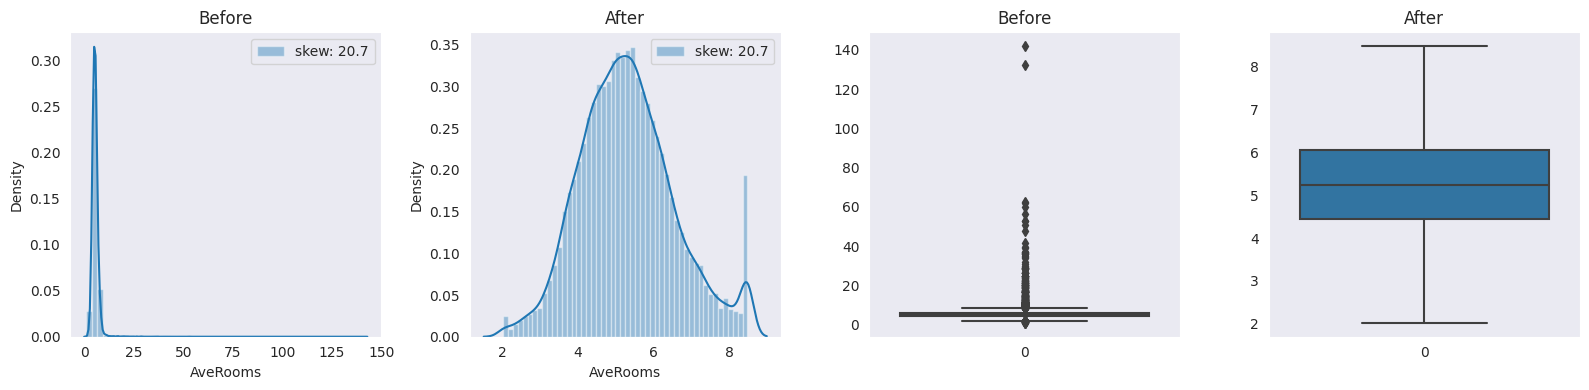

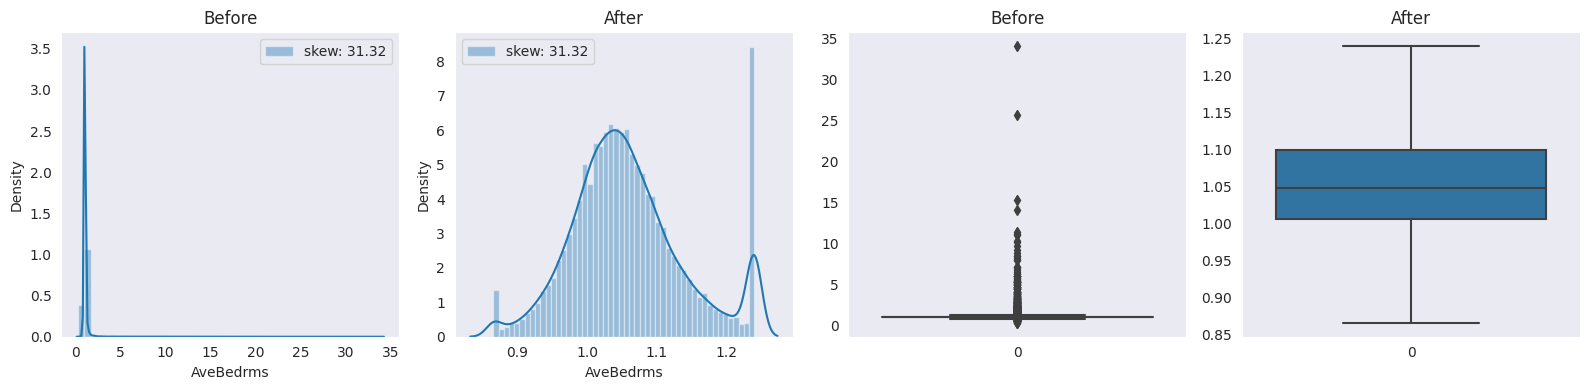

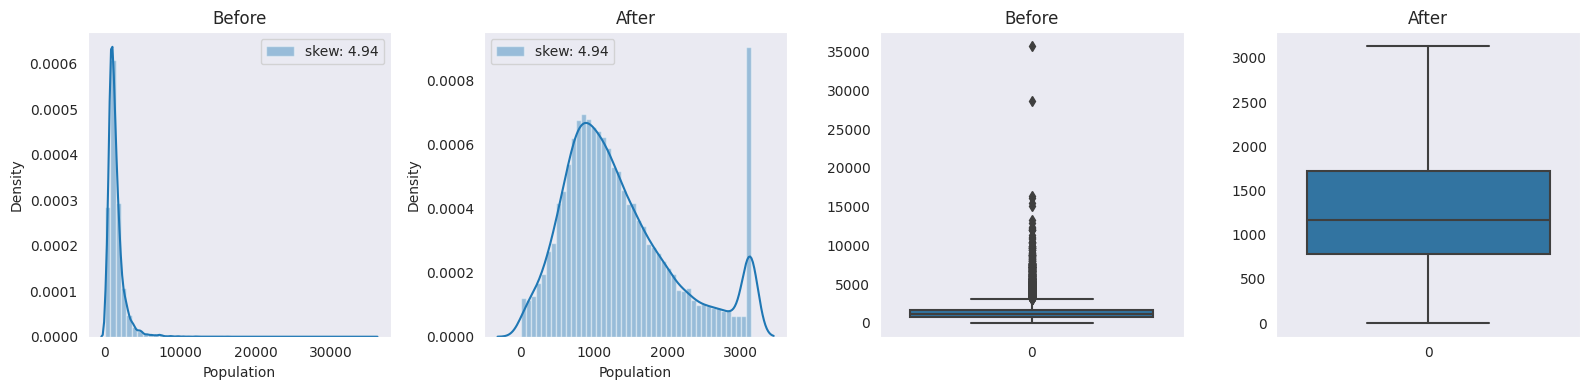

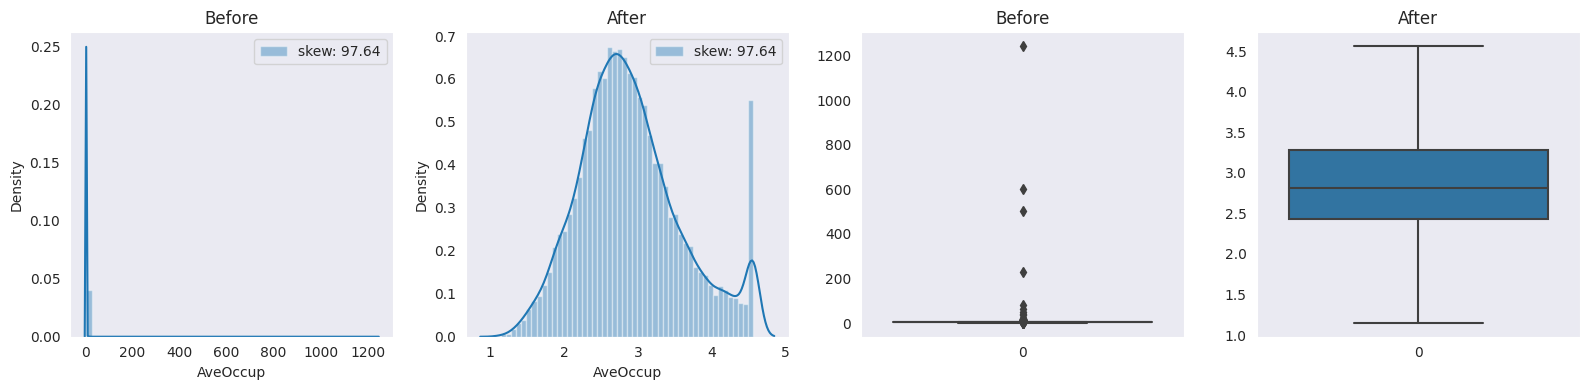

In [92]:
sns.set_style('dark')
for col in features:
  plt.figure(figsize=(16,4))

  plt.subplot(141)
  sns.distplot(df[col], label='skew: ' + str(np.round(df[col].skew(),2)))
  plt.title('Before')
  plt.legend()

  plt.subplot(142)
  sns.distplot(df1[col], label='skew: ' + str(np.round(df[col].skew(),2)))
  plt.title('After')
  plt.legend()

  plt.subplot(143)
  sns.boxplot(df[col])
  plt.title('Before')

  plt.subplot(144)
  sns.boxplot(df1[col])
  plt.title('After')

  plt.tight_layout()
  plt.show()